In [1]:
import pandas as pd
import numpy as np

import pymysql
import getpass
%matplotlib inline

In [2]:
pw = getpass.getpass()

········


In [3]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="ironhack",
                       passwd=pw,
                       db="olist");

# Answer some questions regarding Sellers in 2017

1. How many sellers do we have?
2. How much do they sell?
3. How much revenue do they generate?

---

1. How many sellers do we have?

In [4]:
unique_sellers_query ="""
SELECT DISTINCT
    oi.seller_id
FROM order_items oi
    INNER JOIN orders o
    ON oi.order_id = o.order_id
WHERE o.order_purchase_timestamp >= '20170101'
    AND o.order_purchase_timestamp < '20180101';
"""

unique_sellers = pd.read_sql(unique_sellers_query, conn)

In [5]:
unique_sellers.head()

,seller_id
0,3504c0cb71d7fa48d967e0e4c94d59d9
1,66922902710d126a0e7d26b0e3805106
2,8581055ce74af1daba164fdbd55a40de
3,dc8798cbf453b7e0f98745e396cc5616
4,16090f2ca825584b5a147ab24aa30c86


In [6]:
unique_sellers.count()

seller_id    1784
dtype: int64

We had 1784 sellers in 2017

---

2. How much do they sell?

In [7]:
seller_qty_query = """
SELECT 
    oi.seller_id, 
    COUNT(*) AS items_sold
FROM order_items oi
    INNER JOIN orders o
    ON oi.order_id = o.order_id
WHERE o.order_purchase_timestamp >= '20170101'
    AND o.order_purchase_timestamp < '20180101'
GROUP BY oi.seller_id;
"""

seller_qty = pd.read_sql(seller_qty_query, conn)

In [8]:
seller_qty

,seller_id,items_sold
0,3504c0cb71d7fa48d967e0e4c94d59d9,53
1,66922902710d126a0e7d26b0e3805106,64
2,8581055ce74af1daba164fdbd55a40de,310
3,dc8798cbf453b7e0f98745e396cc5616,49
4,16090f2ca825584b5a147ab24aa30c86,78
...,...,...
1779,72c73be2b085b9d57650dd53eb2004c9,1
1780,9ef932e837d8b7f392c0bfee9d359dc2,1
1781,2d8cfba3fcd3170555941605edaa196a,1
1782,8501d82f68d23148b6d78bb7c4a42037,1


In [10]:
seller_qty.describe()

,items_sold
count,1784.000000
mean,28.511211
std,80.941965
min,1.000000
25%,2.000000
50%,6.000000
75%,22.000000
max,1258.000000


Top seller had 1258 sales in 2017

Lowest performing seller only sold 1 item

Half of the sellers sold no more than 6 items

75% sold no more than 22 items

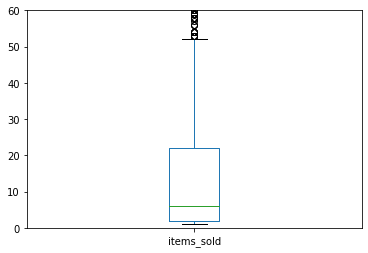

In [16]:
seller_qty.plot(kind="box", ylim=(0,60));

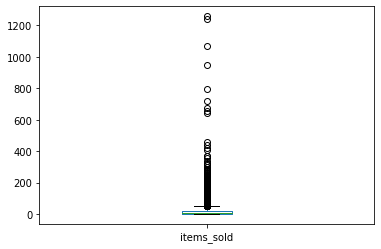

In [18]:
seller_qty.plot(kind="box");

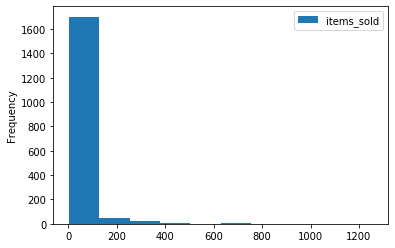

In [19]:
seller_qty.plot(kind="hist");

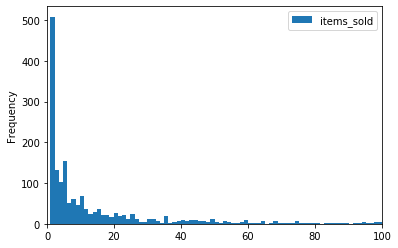

In [21]:
seller_qty.plot(kind="hist", bins=1000, xlim=(0,100));

In [23]:
seller_qty.quantile([.25,.5,.75])

,items_sold
0.25,2.0
0.50,6.0
0.75,22.0


In [28]:
np.arange(0,1,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [31]:
seller_percentiles = seller_qty.quantile(np.arange(0,1,.01))

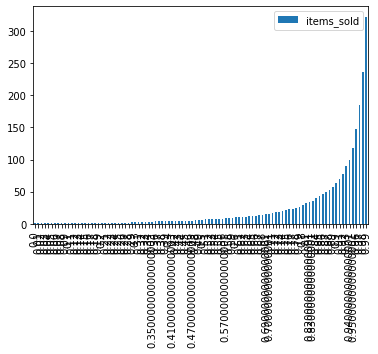

In [87]:
seller_percentiles.plot(kind="bar");

In [35]:
seller_qty.quantile(np.arange(0,1,.1))

,items_sold
0.0,1.0
0.1,1.0
0.2,2.0
0.3,3.0
0.4,4.0
0.5,6.0
0.6,10.0
0.7,16.0
0.8,29.0
0.9,64.0


The top 10% of sellers sold at least 64 items in 2017

3. How much revenue do they generate?

In [36]:
sellers_rev_query = """
SELECT
    oi.seller_id,
    SUM(oi.price) AS revenue_generated
FROM order_items oi
    INNER JOIN orders o
    ON oi.order_id = o.order_id
WHERE o.order_purchase_timestamp >= '20170101'
    AND o.order_purchase_timestamp < '20180101'
GROUP BY oi.seller_id;
"""

sellers_rev = pd.read_sql(sellers_rev_query, conn)

In [38]:
sellers_rev.head()

,seller_id,revenue_generated
0,3504c0cb71d7fa48d967e0e4c94d59d9,2349.940056
1,66922902710d126a0e7d26b0e3805106,5926.800003
2,8581055ce74af1daba164fdbd55a40de,45763.090235
3,dc8798cbf453b7e0f98745e396cc5616,1976.500029
4,16090f2ca825584b5a147ab24aa30c86,11045.279995


In [39]:
sellers_rev.describe()

,revenue_generated
count,1784.000000
mean,3450.564450
std,10407.548587
min,3.500000
25%,205.787502
50%,771.530024
75%,2677.642486
max,181113.919632


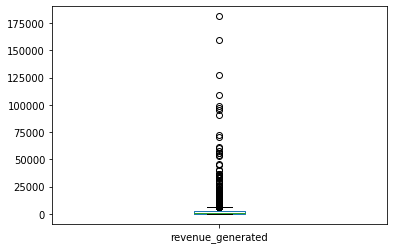

In [41]:
sellers_rev.plot(kind="box");

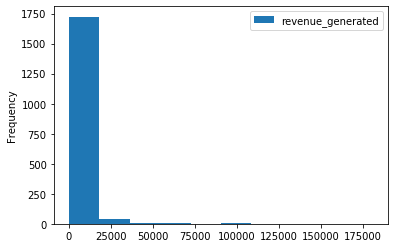

In [43]:
sellers_rev.plot(kind="hist");

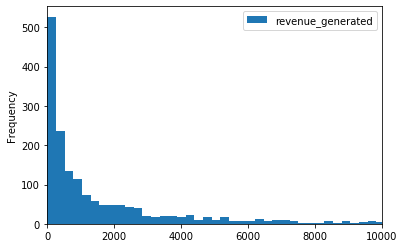

In [45]:
sellers_rev.plot(kind="hist", bins=700, xlim=(0,10000));

In [52]:
sellers_rev.quantile(np.arange(0,1,.1))

,revenue_generated
0.0,3.500000
0.1,74.781000
0.2,151.948000
0.3,273.880993
0.4,447.500000
0.5,771.530024
0.6,1233.213994
0.7,2137.986032
0.8,3598.024061
0.9,7353.310093


We could have done all of that with one query

In [54]:
sellers_table_query = """
SELECT
    oi.seller_id,
    COUNT(1) AS items_sold,
    SUM(oi.price) AS revenue_generated
FROM order_items oi
    INNER JOIN orders o
    ON oi.order_id = o.order_id
WHERE o.order_purchase_timestamp >= '20170101'
    AND o.order_purchase_timestamp < '20180101'
GROUP BY oi.seller_id;
"""

sellers_table = pd.read_sql(sellers_table_query, conn)

In [55]:
sellers_table.head()

,seller_id,items_sold,revenue_generated
0,3504c0cb71d7fa48d967e0e4c94d59d9,53,2349.940056
1,66922902710d126a0e7d26b0e3805106,64,5926.800003
2,8581055ce74af1daba164fdbd55a40de,310,45763.090235
3,dc8798cbf453b7e0f98745e396cc5616,49,1976.500029
4,16090f2ca825584b5a147ab24aa30c86,78,11045.279995


In [56]:
sellers_table.describe()

,items_sold,revenue_generated
count,1784.000000,1784.000000
mean,28.511211,3450.564450
std,80.941965,10407.548587
min,1.000000,3.500000
25%,2.000000,205.787502
50%,6.000000,771.530024
75%,22.000000,2677.642486
max,1258.000000,181113.919632


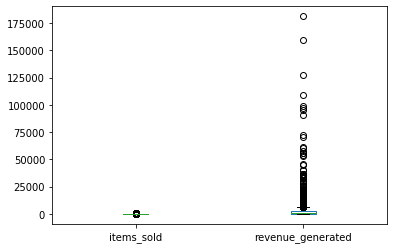

In [59]:
sellers_table.plot(kind="box");

In [61]:
sellers_table.quantile(np.arange(0,1,.1))

,items_sold,revenue_generated
0.0,1.0,3.500000
0.1,1.0,74.781000
0.2,2.0,151.948000
0.3,3.0,273.880993
0.4,4.0,447.500000
0.5,6.0,771.530024
0.6,10.0,1233.213994
0.7,16.0,2137.986032
0.8,29.0,3598.024061
0.9,64.0,7353.310093


Quantifying risk

In [62]:
sellers_table

,seller_id,items_sold,revenue_generated
0,3504c0cb71d7fa48d967e0e4c94d59d9,53,2349.940056
1,66922902710d126a0e7d26b0e3805106,64,5926.800003
2,8581055ce74af1daba164fdbd55a40de,310,45763.090235
3,dc8798cbf453b7e0f98745e396cc5616,49,1976.500029
4,16090f2ca825584b5a147ab24aa30c86,78,11045.279995
...,...,...,...
1779,72c73be2b085b9d57650dd53eb2004c9,1,29.400000
1780,9ef932e837d8b7f392c0bfee9d359dc2,1,59.900002
1781,2d8cfba3fcd3170555941605edaa196a,1,45.000000
1782,8501d82f68d23148b6d78bb7c4a42037,1,19.700001


In [64]:
sellers_table["revenue_generated"].sum()

6155806.979506969

In [69]:
len(sorted_sellers)

1784

In [71]:
sorted_sellers = (sellers_table
                  .sort_values("revenue_generated", ascending=False)
                  .reset_index(drop=True))

sorted_sellers = (sorted_sellers
                  .assign(rank=sorted_sellers.index+1))

In [78]:
sorted_sellers = sorted_sellers.assign(percentile=(1 - sorted_sellers["rank"] / len(sorted_sellers)))

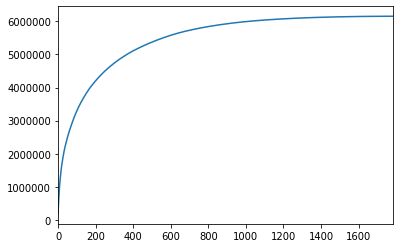

In [77]:
sorted_sellers["revenue_generated"].cumsum().plot()

In [80]:
sorted_sellers = (sorted_sellers.assign(cumulative_revenue=sorted_sellers["revenue_generated"].cumsum()))

In [82]:
sorted_sellers = sorted_sellers.assign(revenue_contribution=sorted_sellers["cumulative_revenue"] / sorted_sellers["revenue_generated"].sum())

In [86]:
sorted_sellers[sorted_sellers["percentile"] >= .99]

,seller_id,items_sold,revenue_generated,rank,percentile,cumulative_revenue,revenue_contribution
0,53243585a1d6dc2643021fd1853d8905,263,181113.919632,1,0.999439,1.811139e+05,0.029422
1,7e93a43ef30c4f03f38b393420bc753a,284,159389.129326,2,0.998879,3.405030e+05,0.055314
2,4a3ca9315b744ce9f8e9374361493884,1238,127584.770979,3,0.998318,4.680878e+05,0.076040
3,46dc3b2cc0980fb8ec44634e21d2718e,462,109056.988525,4,0.997758,5.771448e+05,0.093756
4,fa1c13f2614d7b5c4749cbc52fecda94,288,99028.609367,5,0.997197,6.761734e+05,0.109843
5,7a67c85e85bb2ce8582c35f2203ad736,797,97311.031126,6,0.996637,7.734844e+05,0.125651
6,7c67e1448b00f6e969d365cea6b010ab,655,95176.991259,7,0.996076,8.686614e+05,0.141113
7,4869f7a5dfa277a7dca6462dcf3b52b2,420,91058.029083,8,0.995516,9.597195e+05,0.155905
8,cc419e0650a3c5ba77189a1882b7556a,1258,72340.670095,9,0.994955,1.032060e+06,0.167656
9,da8622b14eb17ae2831f4ac5b9dab84a,644,70786.099499,10,0.994395,1.102846e+06,0.179155


'>25% of our revenue was generated by the top 1% which is 17 individual sellers. We better make sure to keep them happy

In [98]:
list(range(0,100,10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

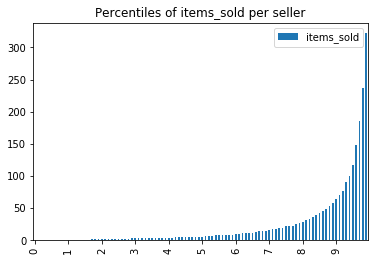

In [95]:
ax = seller_percentiles.plot(kind="bar")

ax.set_xticklabels(list(range(100)));
ax.set_xticks(list(range(0,100,10)));
ax.set_title("Percentiles of items_sold per seller");

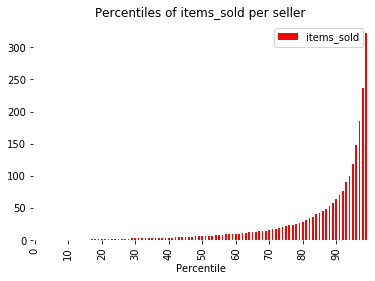

In [105]:
ax = seller_percentiles.plot(kind="bar", color="red")

ax.set_xticklabels(list(range(0,100,10)));
ax.set_xticks(list(range(0,100,10)));
ax.set_title("Percentiles of items_sold per seller");
ax.set_xlabel("Percentile");

# remove spines
# ax.spines["right"].set_visible(False);
# ax.spines["top"].set_visible(False);

ax.set_frame_on(False);

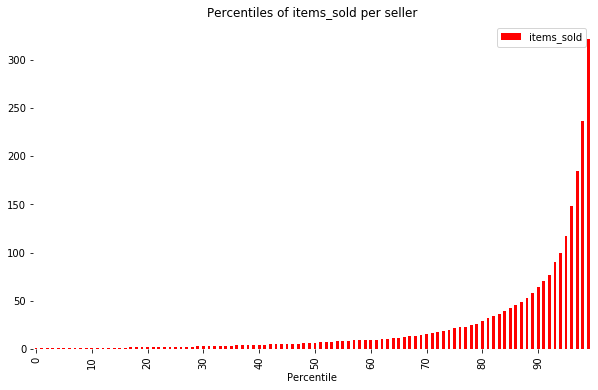

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax = seller_percentiles.plot(kind="bar", color="red", ax=ax)

ax.set_xticklabels(list(range(0,100,10)));
ax.set_xticks(list(range(0,100,10)));
ax.set_title("Percentiles of items_sold per seller");
ax.set_xlabel("Percentile");

# remove spines
# ax.spines["right"].set_visible(False);
# ax.spines["top"].set_visible(False);

ax.set_frame_on(False);